## Import Data

## Introduction

In this example, we will using a simply long hold strategy to demostrate the usage of different rebalancing methods.


We are using a simple version of Ray Dalio's All Weather Portfolio as an example. Ray Dalio's All Weather portfolio consists of the following assets and target weights:

- US Stocks (40%)
- Long Term US Bonds (30%)
- Intermediate US Bonds (15%)
- Gold (7.5%)
- Commodities (7.5%)


In this example, we will simplify it to US Stock Index Fund, Bond ETF and Gold ETF with the following target weights:
- US Stock Index Fund (50%)
- Bond ETF (40%)
- Gold ETF (10%)



In [1]:
from tiportfolio.helpers.data import Alpaca
import dotenv

dotenv.load_dotenv()

import os
alpaca = Alpaca(os.environ['ALPACA_API_KEY'], os.environ['ALPACA_API_SECRET'])

In [2]:
%matplotlib inline


In [3]:
# use apple to test long hold strategy

apple_df = alpaca.query('AAPL', '2019-01-01', '2020-12-31', '1D')
# use date column as index
# apple_df.set_index('date', inplace=True)

Loading bar data...
Loaded bar data: 0:00:01 



In [4]:
# Fix the index to set it to market open time (9:30 AM) - required for rebalancing to work
import pandas as pd

# Set date as index if not already set
if apple_df.index.name != 'date' and 'date' in apple_df.columns:
    apple_df.set_index('date', inplace=True)

# Set index to market open time (9:30 AM) to match rebalance time requirements
# This is critical - rebalancing checks for exact time match (9:30:00)
market_open_index = apple_df.index.normalize() + pd.Timedelta(hours=9, minutes=30)
market_open_index = market_open_index.tz_convert("America/New_York")
apple_df.index = market_open_index
apple_df.index.name = "date"


In [5]:
apple_df.index

DatetimeIndex(['2019-01-02 09:30:00-05:00', '2019-01-03 09:30:00-05:00',
               '2019-01-04 09:30:00-05:00', '2019-01-07 09:30:00-05:00',
               '2019-01-08 09:30:00-05:00', '2019-01-09 09:30:00-05:00',
               '2019-01-10 09:30:00-05:00', '2019-01-11 09:30:00-05:00',
               '2019-01-14 09:30:00-05:00', '2019-01-15 09:30:00-05:00',
               ...
               '2020-12-16 09:30:00-05:00', '2020-12-17 09:30:00-05:00',
               '2020-12-18 09:30:00-05:00', '2020-12-21 09:30:00-05:00',
               '2020-12-22 09:30:00-05:00', '2020-12-23 09:30:00-05:00',
               '2020-12-24 09:30:00-05:00', '2020-12-28 09:30:00-05:00',
               '2020-12-29 09:30:00-05:00', '2020-12-30 09:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='date', length=504, freq=None)

## Try Long Hold Strategy

In [6]:
from tiportfolio.strategy_library.trading.long_hold import LongHold
long_hold_strategy = LongHold(stock_symbol="AAPL", prices=apple_df)
long_hold_strategy.before_all()

for step in long_hold_strategy.all_steps:
    long_hold_strategy.execute(step)



long_hold_strategy.after_all()[0]

symbol    open    high     low   close       volume  \
date                                                                            
2019-01-02 09:30:00-05:00   AAPL   36.82   37.76   36.66   37.54  158163180.0   
2019-01-03 09:30:00-05:00   AAPL   34.23   34.64   33.76   33.80  387734780.0   
2019-01-04 09:30:00-05:00   AAPL   34.36   35.31   34.18   35.24  247113388.0   
2019-01-07 09:30:00-05:00   AAPL   35.35   35.38   34.68   35.17  230235968.0   
2019-01-08 09:30:00-05:00   AAPL   35.55   36.09   35.31   35.84  173051260.0   
...                          ...     ...     ...     ...     ...          ...   
2020-12-23 09:30:00-05:00   AAPL  128.66  128.93  127.32  127.50   96689113.0   
2020-12-24 09:30:00-05:00   AAPL  127.85  129.93  127.63  128.48   56888726.0   
2020-12-28 09:30:00-05:00   AAPL  130.45  133.71  129.98  133.08  131183580.0   
2020-12-29 09:30:00-05:00   AAPL  134.39  135.12  130.79  131.30  126214348.0   
2020-12-30 09:30:00-05:00   AAPL  131.99  132.39  129.87  130.18  100802947.0   

                             vwap  signal       pnl     value  cumulative_pnl  \
date                                                                            
2019-01-02 09:30:00-05:00   37.33     1.0  0.000000  1.000000        0.000000   
2019-01-03 09:30:00-05:00   34.11     1.0 -0.099627  0.900373       -0.099627   
2019-01-04 09:30:00-05:00   34.92     1.0  0.042604  0.938732       -0.061268   
2019-01-07 09:30:00-05:00   35.04     1.0 -0.001986  0.936867       -0.063133   
2019-01-08 09:30:00-05:00   35.69     1.0  0.019050  0.954715       -0.045285   
...                           ...     ...       ...       ...             ...   
2020-12-23 09:30:00-05:00  128.09     1.0 -0.006932  3.396377        2.396377   
2020-12-24 09:30:00-05:00  128.86     1.0  0.007686  3.422483        2.422483   
2020-12-28 09:30:00-05:00  132.28     1.0  0.035803  3.545019        2.545019   
2020-12-29 09:30:00-05:00  132.74     1.0 -0.013375  3.497603        2.497603   
2020-12-30 09:30:00-05:00  130.75     1.0 -0.008530  3.467768        2.467768   

                           cumulative_max  drawdown  max_drawdown  mar_ratio  
date                                                                          
2019-01-02 09:30:00-05:00        1.000000  0.000000      0.000000   0.000000  
2019-01-03 09:30:00-05:00        1.000000 -0.099627     -0.099627  -1.000000  
2019-01-04 09:30:00-05:00        1.000000 -0.061268     -0.099627  -0.614973  
2019-01-07 09:30:00-05:00        1.000000 -0.063133     -0.099627  -0.633690  
2019-01-08 09:30:00-05:00        1.000000 -0.045285     -0.099627  -0.454545  
...                                   ...       ...           ...        ...  
2020-12-23 09:30:00-05:00        3.473895 -0.022314     -0.314253   7.625625  
2020-12-24 09:30:00-05:00        3.473895 -0.014799     -0.314253   7.708696  
2020-12-28 09:30:00-05:00        3.545019  0.000000     -0.314253   8.098624  
2020-12-29 09:30:00-05:00        3.545019 -0.013375     -0.314253   7.947739  
2020-12-30 09:30:00-05:00        3.545019 -0.021791     -0.314253   7.852800  

[504 rows x 15 columns]

In [7]:
long_hold_strategy.after_all()[1]

{'final_value': 3.467767714437935,
 'total_return': 2.467767714437935,
 'max_drawdown': -0.314253222137983,
 'mar_ratio': 7.852800037017224}

## Try on Fix Ratio Frequency Based Allocation

In [8]:
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

config:PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.04,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

long_hold_strategy = LongHold(stock_symbol="AAPL", prices=apple_df.loc["2019-01-01":"2019-03-31"])

fix_percentage_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[long_hold_strategy],
    allocation_ratio_list=[1.0],
    rebalance_frequency=RebalanceFrequency.mid_of_month,
)

INFO:default_logger:Initialized Allocation with 1 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - AAPL


INFO:default_logger:Starting walk-forward allocation process...
 10%|▉         | 6/61 [00:01<00:13,  4.06it/s]DEBUG:default_logger:At 2019-01-10 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-11 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
 15%|█▍        | 9/61 [00:02<00:08,  6.07it/s]DEBUG:default_logger:At 2019-01-15 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:Rebalancing at 2019-01-15 09:30:00-05:00
DEBUG:default_logger:At 2019-01-16 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-17 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
 20%|█▉        | 12/61 [00:02<00:05,  9.25it/s]DEBUG:default_logger:At 2019-01-18 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-22 09:30:00-05:00, Strate

Starting portfolio evaluation...


  0%|          | 0/61 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-08 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-09 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-10 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-11 09:3

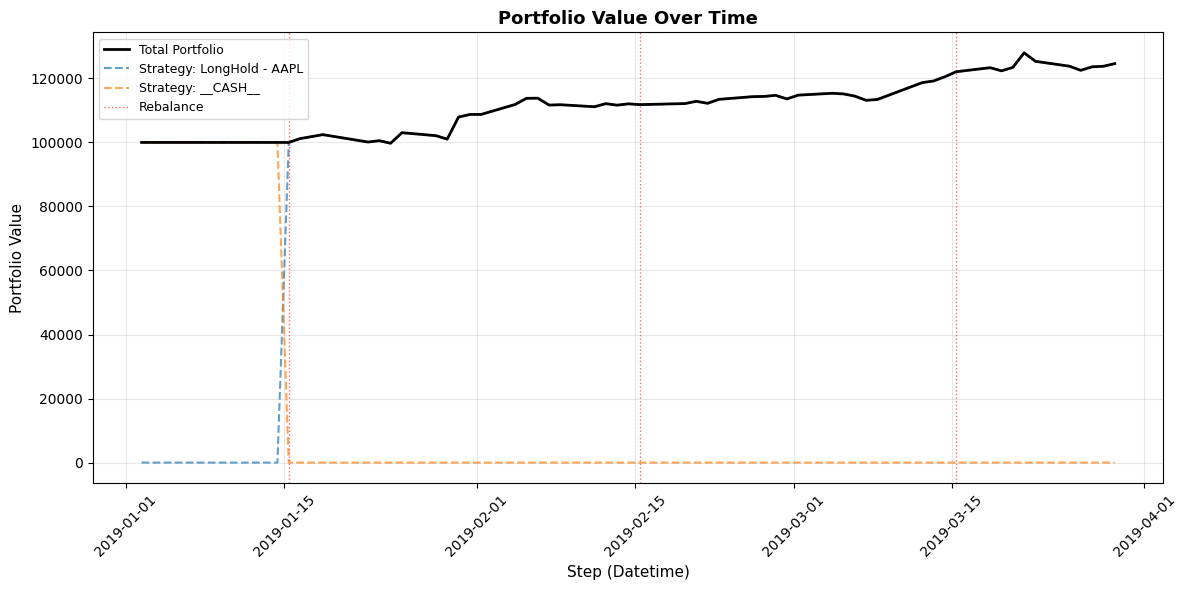

{'final_value': 124609.68672712284,
 'total_return': 0.2460968672712284,
 'max_drawdown': -0.0427221983683983,
 'sharpe_ratio': np.float64(6.45431584690706),
 'annualized_return': 1.5195186509091725,
 'mar_ratio': 5.7603980288913865}

In [9]:
fix_percentage_allocation.walk_forward()
fix_percentage_allocation.evaluate()
fix_percentage_allocation.get_performance_metrics(plot=True)

In [10]:
fix_percentage_allocation.portfolio_df

signal   open   high    low  close  \
datetime                  strategy_name                                        
2019-01-02 09:30:00-05:00 LongHold - AAPL    1.0  36.82  37.76  36.66  37.54   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-01-03 09:30:00-05:00 LongHold - AAPL    1.0  34.23  34.64  33.76   33.8   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-01-04 09:30:00-05:00 LongHold - AAPL    1.0  34.36  35.31  34.18  35.24   
...                                          ...    ...    ...    ...    ...   
2019-03-27 09:30:00-04:00 __CASH__             0    1.0    1.0    1.0    1.0   
2019-03-28 09:30:00-04:00 LongHold - AAPL    1.0  45.11  45.25  44.77  45.05   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-03-29 09:30:00-04:00 LongHold - AAPL    1.0  45.32  45.38  45.01  45.35   
                          __CASH__             0    1.0    1.0    1.0    1.0   

                                              quantity          value fees  \
datetime                  strategy_name                                      
2019-01-02 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
                          __CASH__              100000         100000  0.0   
2019-01-03 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
                          __CASH__              100000         100000  0.0   
2019-01-04 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
...                                                ...            ...  ...   
2019-03-27 09:30:00-04:00 __CASH__                 0.0            0.0  0.0   
2019-03-28 09:30:00-04:00 LongHold - AAPL  2747.732894  123785.366859  0.0   
                          __CASH__                 0.0            0.0  0.0   
2019-03-29 09:30:00-04:00 LongHold - AAPL  2747.732894  124609.686727  0.0   
                          __CASH__                 0.0            0.0  0.0   

                                          cost_basis  
datetime                  strategy_name               
2019-01-02 09:30:00-05:00 LongHold - AAPL        0.0  
                          __CASH__               0.0  
2019-01-03 09:30:00-05:00 LongHold - AAPL        0.0  
                          __CASH__               0.0  
2019-01-04 09:30:00-05:00 LongHold - AAPL        0.0  
...                                              ...  
2019-03-27 09:30:00-04:00 __CASH__               0.0  
2019-03-28 09:30:00-04:00 LongHold - AAPL       10.0  
                          __CASH__               0.0  
2019-03-29 09:30:00-04:00 LongHold - AAPL       10.0  
                          __CASH__               0.0  

[122 rows x 9 columns]

# Comparison between Long Hold SPY and SPY + BIL + GLD Fix Ratio Rebalance

In [11]:
# Load and prepare data for VOO, BIL, and GLD
voo_df = alpaca.query('VOO', '2019-01-01', '2024-12-31', '1D')
bil_df = alpaca.query('BIL', '2019-01-01', '2024-12-31', '1D')
gld_df = alpaca.query('GLD', '2019-01-01', '2024-12-31', '1D')

# Fix the index to set it to market open time (9:30 AM) for all three DataFrames
for df in [voo_df, bil_df, gld_df]:
    # Set date as index if not already set
    if df.index.name != 'date' and 'date' in df.columns:
        df.set_index('date', inplace=True)
    
    # Set index to market open time (9:30 AM) to match rebalance time requirements
    market_open_index = df.index.normalize() + pd.Timedelta(hours=9, minutes=30)
    market_open_index = market_open_index.tz_convert("America/New_York")
    df.index = market_open_index
    df.index.name = "date"


Loading bar data...
Loaded bar data: 0:00:01 

Loading bar data...
Loaded bar data: 0:00:00 

Loading bar data...
Loaded bar data: 0:00:00 



In [22]:
# Load and prepare data for BRK.B
brkb_df = alpaca.query('BRK.B', '2019-01-01', '2024-12-31', '1D')

# Fix the index to set it to market open time (9:30 AM) for BRK.B DataFrame
# Set date as index if not already set
if brkb_df.index.name != 'date' and 'date' in brkb_df.columns:
    brkb_df.set_index('date', inplace=True)

# Set index to market open time (9:30 AM) to match rebalance time requirements
market_open_index = brkb_df.index.normalize() + pd.Timedelta(hours=9, minutes=30)
market_open_index = market_open_index.tz_convert("America/New_York")
brkb_df.index = market_open_index
brkb_df.index.name = "date"


Loading bar data...
Loaded bar data: 0:00:02 



In [23]:
# Validate that BRK.B dataframe has compatible index with VOO and GLD
import logging

# Get logger
logger = logging.getLogger("default_logger")

# Get index sets for comparison
voo_index_set = set(voo_df.index)
gld_index_set = set(gld_df.index)

logger.info("Checking BRK.B DataFrame index compatibility...")
logger.info(f"BRK.B index length: {len(brkb_df.index)}")

# Check index types
logger.info(f"BRK.B index type: {type(brkb_df.index)}, dtype: {brkb_df.index.dtype}")

# Check timezone information
brkb_tz = getattr(brkb_df.index, 'tz', None)
logger.info(f"BRK.B timezone: {brkb_tz}")

# Use pandas Index.equals() for strict comparison with VOO and GLD
voo_equals_brkb = voo_df.index.equals(brkb_df.index)
gld_equals_brkb = gld_df.index.equals(brkb_df.index)

if voo_equals_brkb and gld_equals_brkb:
    logger.info("BRK.B DataFrame index is strictly identical with VOO and GLD (using Index.equals()).")
else:
    logger.warning("BRK.B DataFrame index is NOT strictly identical with VOO/GLD!")
    if not voo_equals_brkb:
        logger.warning("VOO and BRK.B indices are not equal")
    if not gld_equals_brkb:
        logger.warning("GLD and BRK.B indices are not equal")

# Check for dates present in one but not others using set comparison
brkb_index_set = set(brkb_df.index)
voo_brkb_common = voo_index_set & brkb_index_set
gld_brkb_common = gld_index_set & brkb_index_set
all_common = voo_index_set & brkb_index_set & gld_index_set

logger.info(f"Common dates between VOO and BRK.B: {len(voo_brkb_common)}")
logger.info(f"Common dates between GLD and BRK.B: {len(gld_brkb_common)}")
logger.info(f"Common dates across all three dataframes (VOO, GLD, BRK.B): {len(all_common)}")
if len(all_common) < len(voo_df.index):
    logger.warning(f"Only {len(all_common)}/{len(voo_df.index)} dates are common across all dataframes")


INFO:default_logger:Checking BRK.B DataFrame index compatibility...
INFO:default_logger:BRK.B index length: 1509
INFO:default_logger:BRK.B index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:BRK.B timezone: America/New_York
INFO:default_logger:BRK.B DataFrame index is strictly identical with VOO and GLD (using Index.equals()).
INFO:default_logger:Common dates between VOO and BRK.B: 1509
INFO:default_logger:Common dates between GLD and BRK.B: 1509
INFO:default_logger:Common dates across all three dataframes (VOO, GLD, BRK.B): 1509


In [ ]:
# Validate that VOO, BIL, and GLD dataframes have identical indices
import logging

# Get logger
logger = logging.getLogger("default_logger")

# Check index properties
logger.info("Checking DataFrame index compatibility...")
logger.info(f"VOO index length: {len(voo_df.index)}")
logger.info(f"BIL index length: {len(bil_df.index)}")
logger.info(f"GLD index length: {len(gld_df.index)}")

# Check index types
logger.info(f"VOO index type: {type(voo_df.index)}, dtype: {voo_df.index.dtype}")
logger.info(f"BIL index type: {type(bil_df.index)}, dtype: {bil_df.index.dtype}")
logger.info(f"GLD index type: {type(gld_df.index)}, dtype: {gld_df.index.dtype}")

# Check timezone information
voo_tz = getattr(voo_df.index, 'tz', None)
bil_tz = getattr(bil_df.index, 'tz', None)
gld_tz = getattr(gld_df.index, 'tz', None)
logger.info(f"VOO timezone: {voo_tz}")
logger.info(f"BIL timezone: {bil_tz}")
logger.info(f"GLD timezone: {gld_tz}")

# Use pandas Index.equals() for strict comparison
voo_equals_bil = voo_df.index.equals(bil_df.index)
voo_equals_gld = voo_df.index.equals(gld_df.index)
bil_equals_gld = bil_df.index.equals(gld_df.index)

if voo_equals_bil and voo_equals_gld and bil_equals_gld:
    logger.info("All DataFrame indices are strictly identical (using Index.equals()).")
else:
    logger.warning("DataFrame indices are NOT strictly identical!")
    if not voo_equals_bil:
        logger.warning("VOO and BIL indices are not equal")
    if not voo_equals_gld:
        logger.warning("VOO and GLD indices are not equal")
    if not bil_equals_gld:
        logger.warning("BIL and GLD indices are not equal")

# Test actual get_loc() lookups on sample timestamps
logger.info("Testing get_loc() lookups on sample timestamps...")
test_timestamps = list(voo_df.index[:5])  # Test first 5 timestamps from VOO

lookup_errors = []
for ts in test_timestamps:
    try:
        voo_df.index.get_loc(ts)
    except KeyError as e:
        lookup_errors.append(f"VOO: KeyError for {ts}: {e}")
    
    try:
        bil_df.index.get_loc(ts)
    except KeyError as e:
        lookup_errors.append(f"BIL: KeyError for {ts}: {e}")
    
    try:
        gld_df.index.get_loc(ts)
    except KeyError as e:
        lookup_errors.append(f"GLD: KeyError for {ts}: {e}")

if lookup_errors:
    logger.error("get_loc() lookup failures detected:")
    for error in lookup_errors:
        logger.error(f"  {error}")
else:
    logger.info("All get_loc() lookups successful on test timestamps")

# Check for dates present in one but not others using set comparison
voo_index_set = set(voo_df.index)
bil_index_set = set(bil_df.index)
gld_index_set = set(gld_df.index)

voo_only = voo_index_set - bil_index_set - gld_index_set
bil_only = bil_index_set - voo_index_set - gld_index_set
gld_only = gld_index_set - voo_index_set - bil_index_set

if voo_only or bil_only or gld_only:
    logger.warning("Date differences found (using set comparison):")
    if voo_only:
        logger.warning(f"Dates in VOO but not in BIL/GLD ({len(voo_only)}): {sorted(list(voo_only))[:10]}")
    if bil_only:
        logger.warning(f"Dates in BIL but not in VOO/GLD ({len(bil_only)}): {sorted(list(bil_only))[:10]}")
    if gld_only:
        logger.warning(f"Dates in GLD but not in VOO/BIL ({len(gld_only)}): {sorted(list(gld_only))[:10]}")

# Test intersection to see if indices are compatible
common_dates = voo_index_set & bil_index_set & gld_index_set
logger.info(f"Common dates across all three dataframes: {len(common_dates)}")
if len(common_dates) < len(voo_df.index):
    logger.warning(f"Only {len(common_dates)}/{len(voo_df.index)} dates are common across all dataframes")


INFO:default_logger:Checking DataFrame index compatibility...
INFO:default_logger:VOO index length: 1509
INFO:default_logger:BIL index length: 1509
INFO:default_logger:GLD index length: 1509
INFO:default_logger:VOO index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:BIL index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:GLD index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:VOO timezone: America/New_York
INFO:default_logger:BIL timezone: America/New_York
INFO:default_logger:GLD timezone: America/New_York
INFO:default_logger:All DataFrame indices are strictly identical (using Index.equals()).
INFO:default_logger:Testing get_loc() lookups on sample timestamps...
INFO:default_logger:All get_loc() lookups successful on test timestamps
INFO:default_logger:Common dates

In [13]:
# Create VOO Long Hold Allocation (100% VOO)
from tiportfolio.strategy_library.trading.long_hold import LongHold
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

config: PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.04,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

voo_long_hold_strategy = LongHold(stock_symbol="VOO", prices=voo_df)

voo_long_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_long_hold_strategy],
    allocation_ratio_list=[1.0],
    rebalance_frequency=RebalanceFrequency.mid_of_month,
)

voo_long_allocation.walk_forward()
voo_long_allocation.evaluate()


INFO:default_logger:Initialized Allocation with 1 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger:Starting walk-forward allocation process...
  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
  0%|          | 2/1509 [00:00<02:01, 12.41it/s]DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-07 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
  0%|          | 4/1509 [00:00<02:01, 12.37it/s]DEBUG:default_logger:At 2019-01-08 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-09 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingS

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-08 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-09 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-10 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-11 09

In [ ]:
# Create VOO + BIL + GLD Fix Ratio Allocation (50% VOO, 40% BIL, 10% GLD)
voo_strategy = LongHold(stock_symbol="VOO", prices=voo_df)
bil_strategy = LongHold(stock_symbol="BIL", prices=bil_df)
gld_strategy = LongHold(stock_symbol="GLD", prices=gld_df)

voo_bond_gold_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy, bil_strategy, gld_strategy],
    allocation_ratio_list=[0.5, 0.4, 0.1],
    rebalance_frequency=RebalanceFrequency.mid_of_month,
)

voo_bond_gold_allocation.walk_forward()
voo_bond_gold_allocation.evaluate()


INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - BIL
INFO:default_logger: - Strategy: LongHold - GLD
INFO:default_logger:Starting walk-forward allocation process...
  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingS

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 

VOO Long Hold Metrics


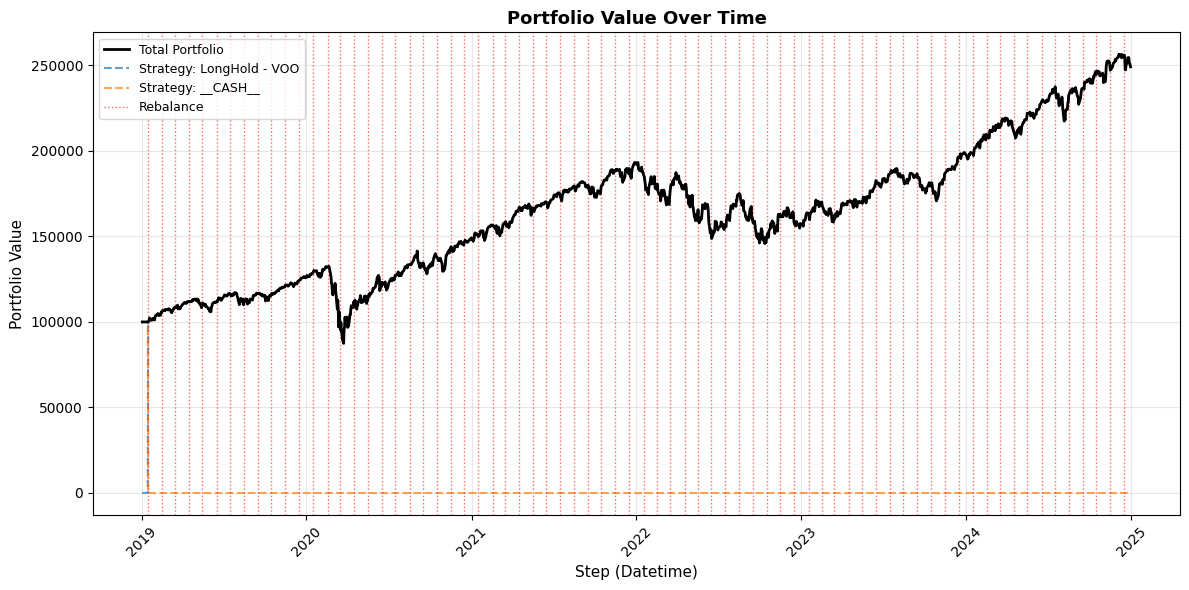

final_value: 249126.600000
total_return: 1.491266
max_drawdown: -0.340074
sharpe_ratio: 0.632551
annualized_return: 0.164784
mar_ratio: 4.385124

VOO + BIL + GLD Fix Ratio Rebalance Metrics


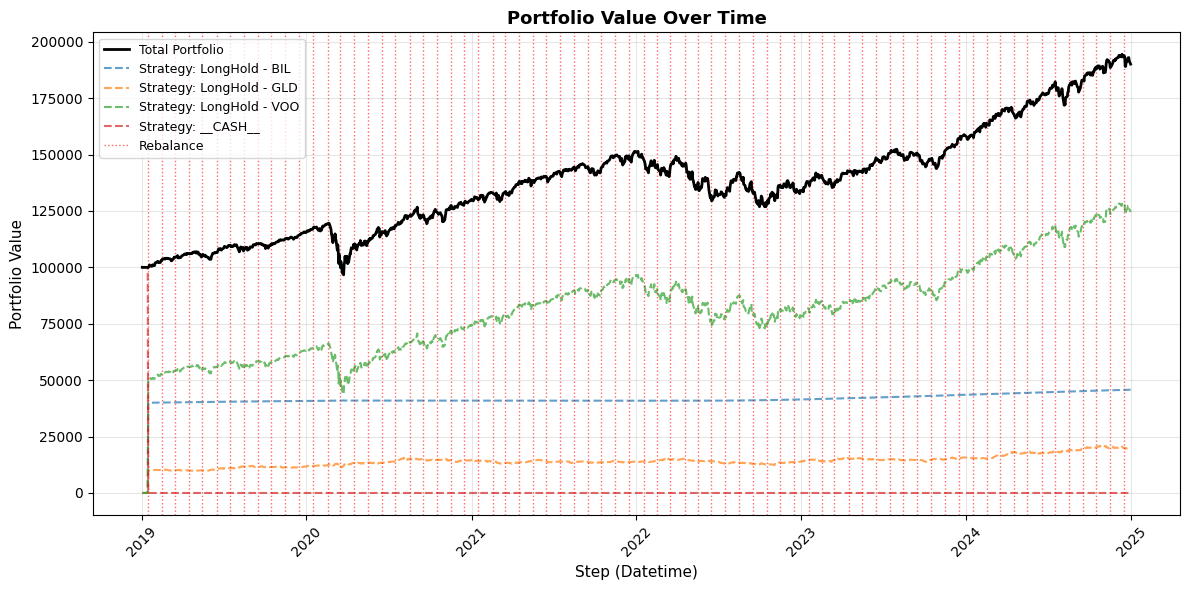

final_value: 190064.905948
total_return: 0.900649
max_drawdown: -0.191367
sharpe_ratio: 0.648891
annualized_return: 0.113287
mar_ratio: 4.706400


In [15]:
# Print metrics for both allocations
print("=" * 60)
print("VOO Long Hold Metrics")
print("=" * 60)
voo_long_metrics = voo_long_allocation.get_performance_metrics(plot=True)
for key, value in voo_long_metrics.items():
    print(f"{key}: {value:.6f}")

print("\n" + "=" * 60)
print("VOO + BIL + GLD Fix Ratio Rebalance Metrics")
print("=" * 60)
voo_bond_gold_metrics = voo_bond_gold_allocation.get_performance_metrics(plot=True)
for key, value in voo_bond_gold_metrics.items():
    print(f"{key}: {value:.6f}")


### Summary

As we can see from above, we can archieve a better sharpe ratio, lower max drawdown and higher mar ratio by using a diversified portfolio with regular rebalancing compared to a single asset long hold strategy, but the final value (annulized return) is not higher.


# Try on Beginning of Month and End of Month Rebalance

Compare Beginning of Month, Middle of Month and End of Month Rebalance

- with 70 VOO, 20 BIL, 10 GLD allocation

In [ ]:
# Create three allocation strategies with different rebalance frequencies
# 70% VOO, 20% BIL, 10% GLD allocation

from tiportfolio.strategy_library.trading.long_hold import LongHold
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

# Use the same config as before
config: PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.04,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

# Create LongHold strategies for each asset
voo_strategy = LongHold(stock_symbol="VOO", prices=voo_df)
bil_strategy = LongHold(stock_symbol="BIL", prices=bil_df)
gld_strategy = LongHold(stock_symbol="GLD", prices=gld_df)

# Create three allocations with different rebalance frequencies
# Allocation: 70% VOO, 20% BIL, 10% GLD
start_of_month_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy, bil_strategy, gld_strategy],
    allocation_ratio_list=[0.7, 0.2, 0.1],
    rebalance_frequency=RebalanceFrequency.start_of_month,
)

mid_of_month_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy, bil_strategy, gld_strategy],
    allocation_ratio_list=[0.7, 0.2, 0.1],
    rebalance_frequency=RebalanceFrequency.mid_of_month,
)

end_of_month_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy, bil_strategy, gld_strategy],
    allocation_ratio_list=[0.7, 0.2, 0.1],
    rebalance_frequency=RebalanceFrequency.end_of_month,
)

# Run walk-forward and evaluate for all three allocations
print("Running Beginning of Month rebalance...")
start_of_month_allocation.walk_forward()
start_of_month_allocation.evaluate()

print("\nRunning Middle of Month rebalance...")
mid_of_month_allocation.walk_forward()
mid_of_month_allocation.evaluate()

print("\nRunning End of Month rebalance...")
end_of_month_allocation.walk_forward()
end_of_month_allocation.evaluate()

print("\nAll simulations completed!")


INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - BIL
INFO:default_logger: - Strategy: LongHold - GLD
INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - BIL
INFO:default_logger: - Strategy: LongHold - GLD
INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - BIL
INFO:default_logger: - Strategy: LongHold - GLD
INFO:default_logger:Starting walk-forward allocation process...


Running Beginning of Month rebalance...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:Rebalancing at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DE

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Total value: 99990.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 98364.15028980357
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100618.06086834983
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade da


Running Middle of Month rebalance...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
  0%|          | 2/1509 [00:00<02:17, 10.96it/s]DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_lo

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 


Running End of Month rebalance...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - BIL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy Long

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 


All simulations completed!


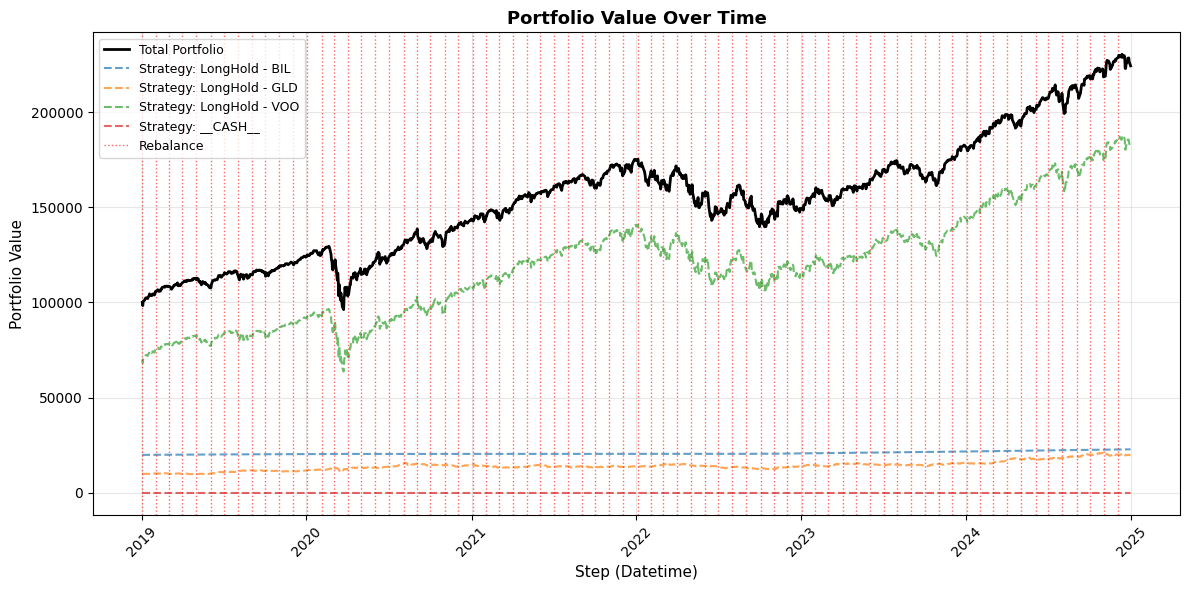

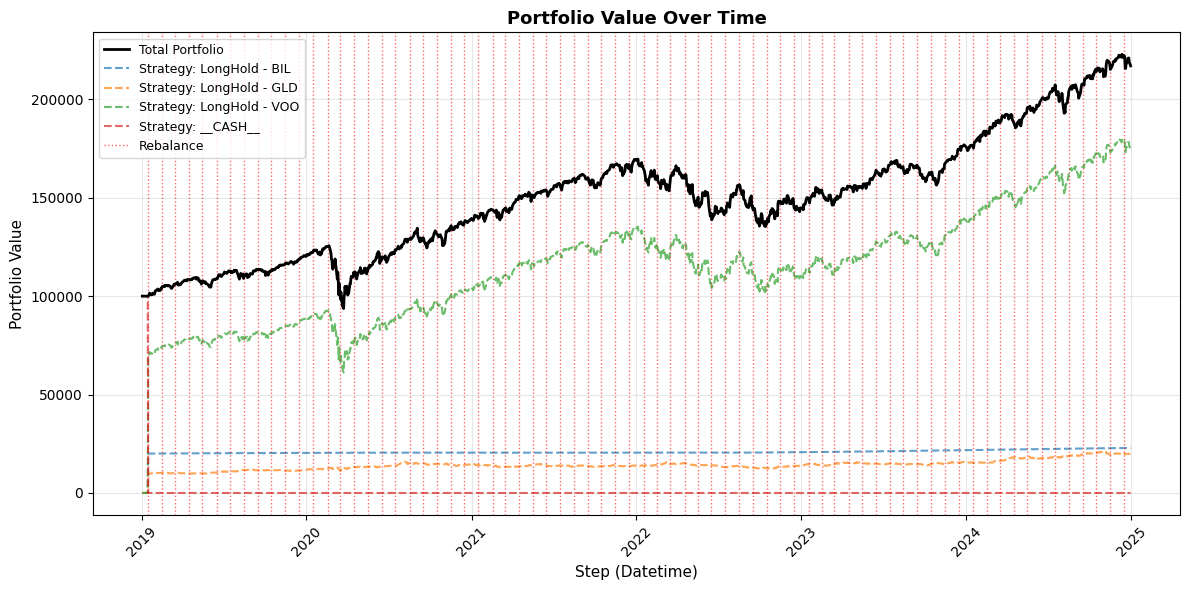

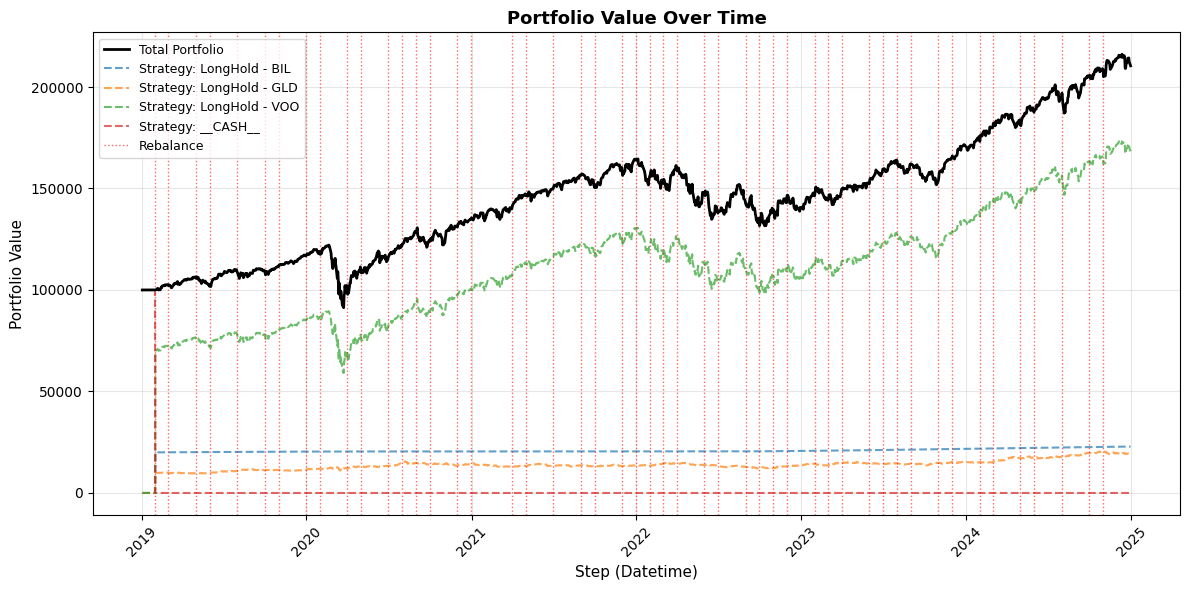

Performance Metrics Comparison: 70% VOO, 20% BIL, 10% GLD
                      final_value  total_return  max_drawdown  sharpe_ratio  annualized_return  mar_ratio
Beginning of Month  224219.164576      1.242192     -0.256632      0.698037           0.144460   4.840370
Middle of Month     217010.030826      1.170100     -0.254261      0.664526           0.138227   4.601962
End of Month        210446.377985      1.104464     -0.252536      0.630167           0.132400   4.373496

Detailed Comparison

Beginning of Month:
----------------------------------------
  final_value: $224,219.16
  total_return: 1.2422 (124.22%)
  max_drawdown: -0.2566 (-25.66%)
  sharpe_ratio: 0.698037
  annualized_return: 0.1445 (14.45%)
  mar_ratio: 4.840370

Middle of Month:
----------------------------------------
  final_value: $217,010.03
  total_return: 1.1701 (117.01%)
  max_drawdown: -0.2543 (-25.43%)
  sharpe_ratio: 0.664526
  annualized_return: 0.1382 (13.82%)
  mar_ratio: 4.601962

End of Month:
-----

In [17]:
# Compare performance metrics for all three strategies
import pandas as pd

# Get metrics for each allocation
start_metrics = start_of_month_allocation.get_performance_metrics(plot=True)
mid_metrics = mid_of_month_allocation.get_performance_metrics(plot=True)
end_metrics = end_of_month_allocation.get_performance_metrics(plot=True)

# Create comparison dataframe
comparison_data = {
    'Beginning of Month': start_metrics,
    'Middle of Month': mid_metrics,
    'End of Month': end_metrics,
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.T  # Transpose so strategies are rows

# Display comparison table
print("=" * 80)
print("Performance Metrics Comparison: 70% VOO, 20% BIL, 10% GLD")
print("=" * 80)
print(comparison_df.to_string())

# Print formatted comparison
print("\n" + "=" * 80)
print("Detailed Comparison")
print("=" * 80)

for strategy_name, metrics in comparison_data.items():
    print(f"\n{strategy_name}:")
    print("-" * 40)
    for key, value in metrics.items():
        if key == 'final_value':
            print(f"  {key}: ${float(value):,.2f}")
        elif key in ['total_return', 'annualized_return']:
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        elif key == 'max_drawdown':
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        else:
            print(f"  {key}: {float(value):.6f}")


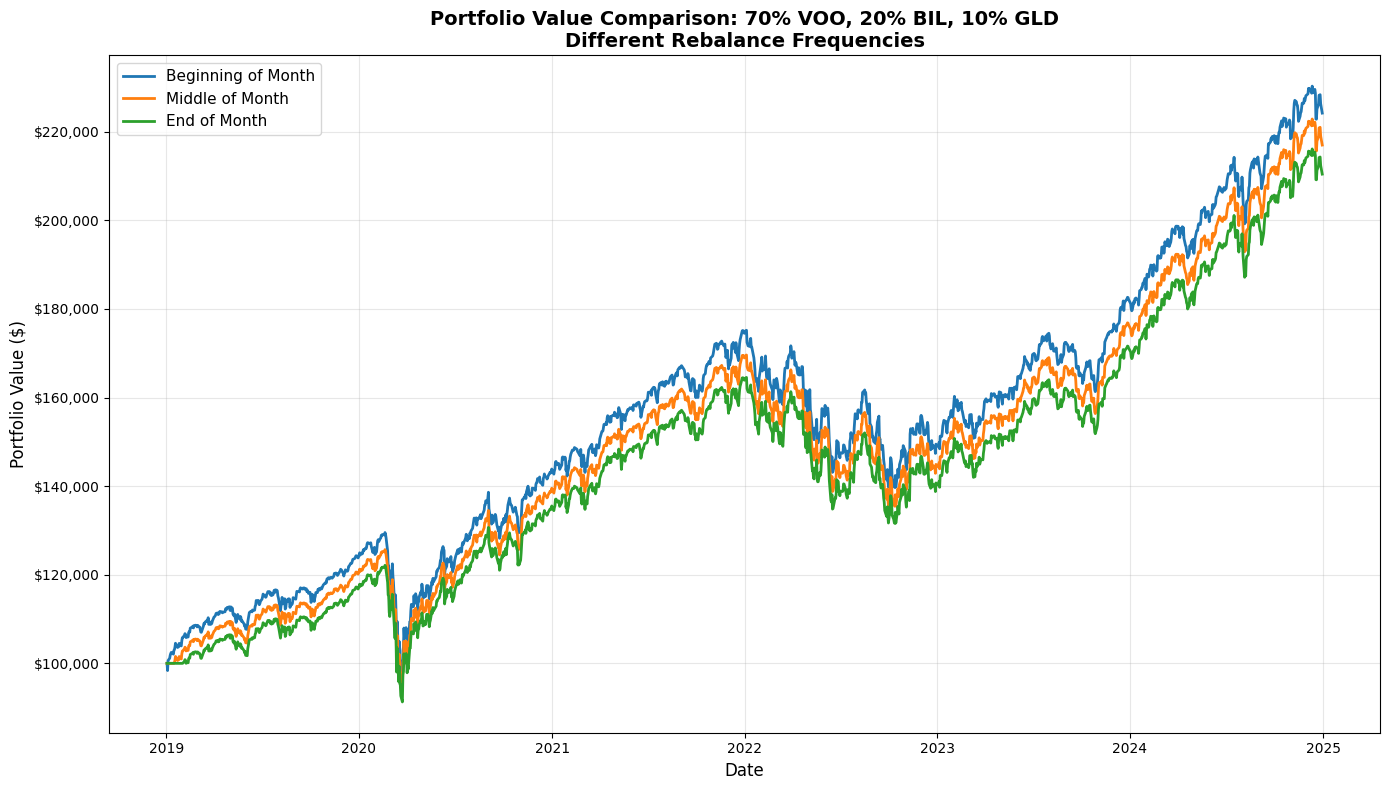


Final Portfolio Values
Beginning of Month: $224,219.16
Middle of Month:    $217,010.03
End of Month:       $210,446.38


In [18]:
# Visualize portfolio values over time for all three strategies
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Get portfolio values for each strategy
def get_portfolio_values(allocation):
    unique_steps = sorted(allocation.portfolio_df.index.get_level_values(0).unique())
    values = []
    for step in unique_steps:
        total_value = allocation.get_total_portfolio_value(step)
        values.append(total_value)
    return unique_steps, np.array(values)

start_steps, start_values = get_portfolio_values(start_of_month_allocation)
mid_steps, mid_values = get_portfolio_values(mid_of_month_allocation)
end_steps, end_values = get_portfolio_values(end_of_month_allocation)

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(start_steps, start_values, label='Beginning of Month', linewidth=2)
ax.plot(mid_steps, mid_values, label='Middle of Month', linewidth=2)
ax.plot(end_steps, end_values, label='End of Month', linewidth=2)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Portfolio Value ($)', fontsize=12)
ax.set_title('Portfolio Value Comparison: 70% VOO, 20% BIL, 10% GLD\nDifferent Rebalance Frequencies', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print final values comparison
print("\n" + "=" * 80)
print("Final Portfolio Values")
print("=" * 80)
print(f"Beginning of Month: ${start_values[-1]:,.2f}")
print(f"Middle of Month:    ${mid_values[-1]:,.2f}")
print(f"End of Month:       ${end_values[-1]:,.2f}")


### Summary

- Beginning of Month has a better performance overall compared to Middle of Month and End of Month Rebalance in this example.
- However, the performance does not include BIL dividends, which may affect the results slightly.


- Next, we can try using some other BOND ETFs to replace BIL
- Use less correlated assets to see if we can improve the performance further.

# Replace BIL with BRK.B

70 voo, 20 brk.b, 10 gold rebalance at beginning of month

In [24]:
# Create VOO + BRK.B + GLD Fix Ratio Allocation (70% VOO, 20% BRK.B, 10% GLD)
# Rebalance at beginning of month
from tiportfolio.strategy_library.trading.long_hold import LongHold
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

# Use the same config as before
config: PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.04,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

# Create LongHold strategies for each asset
voo_strategy_brkb = LongHold(stock_symbol="VOO", prices=voo_df)
brkb_strategy = LongHold(stock_symbol="BRK.B", prices=brkb_df)
gld_strategy_brkb = LongHold(stock_symbol="GLD", prices=gld_df)

# Create allocation with BRK.B: 70% VOO, 20% BRK.B, 10% GLD
# Rebalance at beginning of month
voo_brkb_gold_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy_brkb, brkb_strategy, gld_strategy_brkb],
    allocation_ratio_list=[0.7, 0.2, 0.1],
    rebalance_frequency=RebalanceFrequency.start_of_month,
)

print("Running BRK.B strategy (70% VOO, 20% BRK.B, 10% GLD) with beginning of month rebalance...")
voo_brkb_gold_allocation.walk_forward()
voo_brkb_gold_allocation.evaluate()
print("BRK.B strategy simulation completed!")


INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - BRK.B
INFO:default_logger: - Strategy: LongHold - GLD
INFO:default_logger:Starting walk-forward allocation process...


Running BRK.B strategy (70% VOO, 20% BRK.B, 10% GLD) with beginning of month rebalance...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - BRK.B generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:Rebalancing at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - BRK.B generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - GLD generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - BRK.B generated signal: TradingSignal.L

Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Total value: 99990.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 97260.41941242627
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 99860.7968008046
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade data

BRK.B strategy simulation completed!


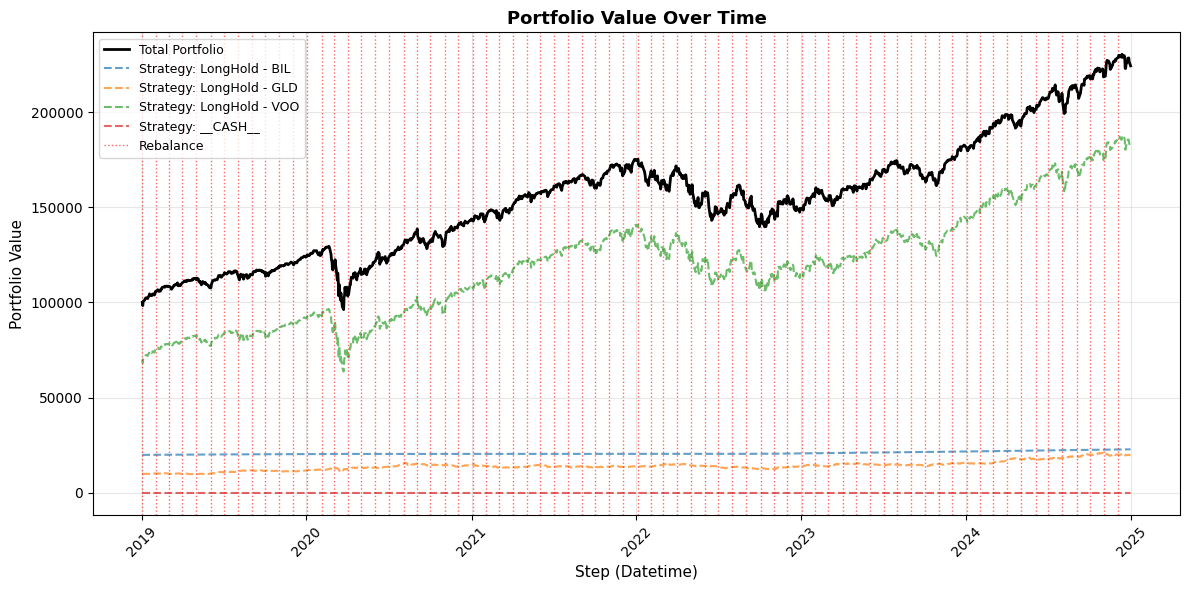

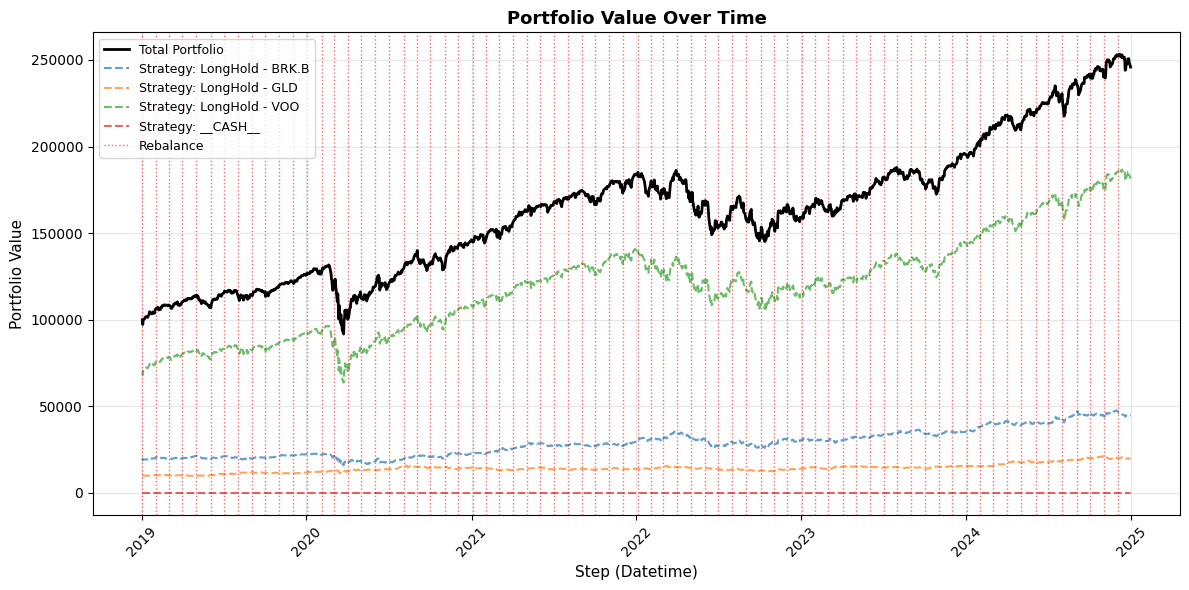

Performance Metrics Comparison: BIL vs BRK.B
Both strategies: 70% VOO, 20% [BIL/BRK.B], 10% GLD, Beginning of Month Rebalance
                               final_value  total_return  max_drawdown  sharpe_ratio  annualized_return  mar_ratio
70% VOO, 20% BIL, 10% GLD    224219.164576      1.242192     -0.256632      0.698037           0.144460   4.840370
70% VOO, 20% BRK.B, 10% GLD  245905.317465      1.459053     -0.303079      0.695663           0.162253   4.814105

Detailed Comparison

70% VOO, 20% BIL, 10% GLD:
----------------------------------------
  final_value: $224,219.16
  total_return: 1.2422 (124.22%)
  max_drawdown: -0.2566 (-25.66%)
  sharpe_ratio: 0.698037
  annualized_return: 0.1445 (14.45%)
  mar_ratio: 4.840370

70% VOO, 20% BRK.B, 10% GLD:
----------------------------------------
  final_value: $245,905.32
  total_return: 1.4591 (145.91%)
  max_drawdown: -0.3031 (-30.31%)
  sharpe_ratio: 0.695663
  annualized_return: 0.1623 (16.23%)
  mar_ratio: 4.814105


In [25]:
# Compare performance metrics between BIL and BRK.B strategies
# Both use 70% VOO, 20% BIL/BRK.B, 10% GLD, rebalanced at beginning of month
import pandas as pd

# Get metrics for each allocation
bil_metrics = start_of_month_allocation.get_performance_metrics(plot=True)
brkb_metrics = voo_brkb_gold_allocation.get_performance_metrics(plot=True)

# Create comparison dataframe
comparison_data = {
    '70% VOO, 20% BIL, 10% GLD': bil_metrics,
    '70% VOO, 20% BRK.B, 10% GLD': brkb_metrics,
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.T  # Transpose so strategies are rows

# Display comparison table
print("=" * 80)
print("Performance Metrics Comparison: BIL vs BRK.B")
print("Both strategies: 70% VOO, 20% [BIL/BRK.B], 10% GLD, Beginning of Month Rebalance")
print("=" * 80)
print(comparison_df.to_string())

# Print formatted comparison
print("\n" + "=" * 80)
print("Detailed Comparison")
print("=" * 80)

for strategy_name, metrics in comparison_data.items():
    print(f"\n{strategy_name}:")
    print("-" * 40)
    for key, value in metrics.items():
        if key == 'final_value':
            print(f"  {key}: ${float(value):,.2f}")
        elif key in ['total_return', 'annualized_return']:
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        elif key == 'max_drawdown':
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        else:
            print(f"  {key}: {float(value):.6f}")


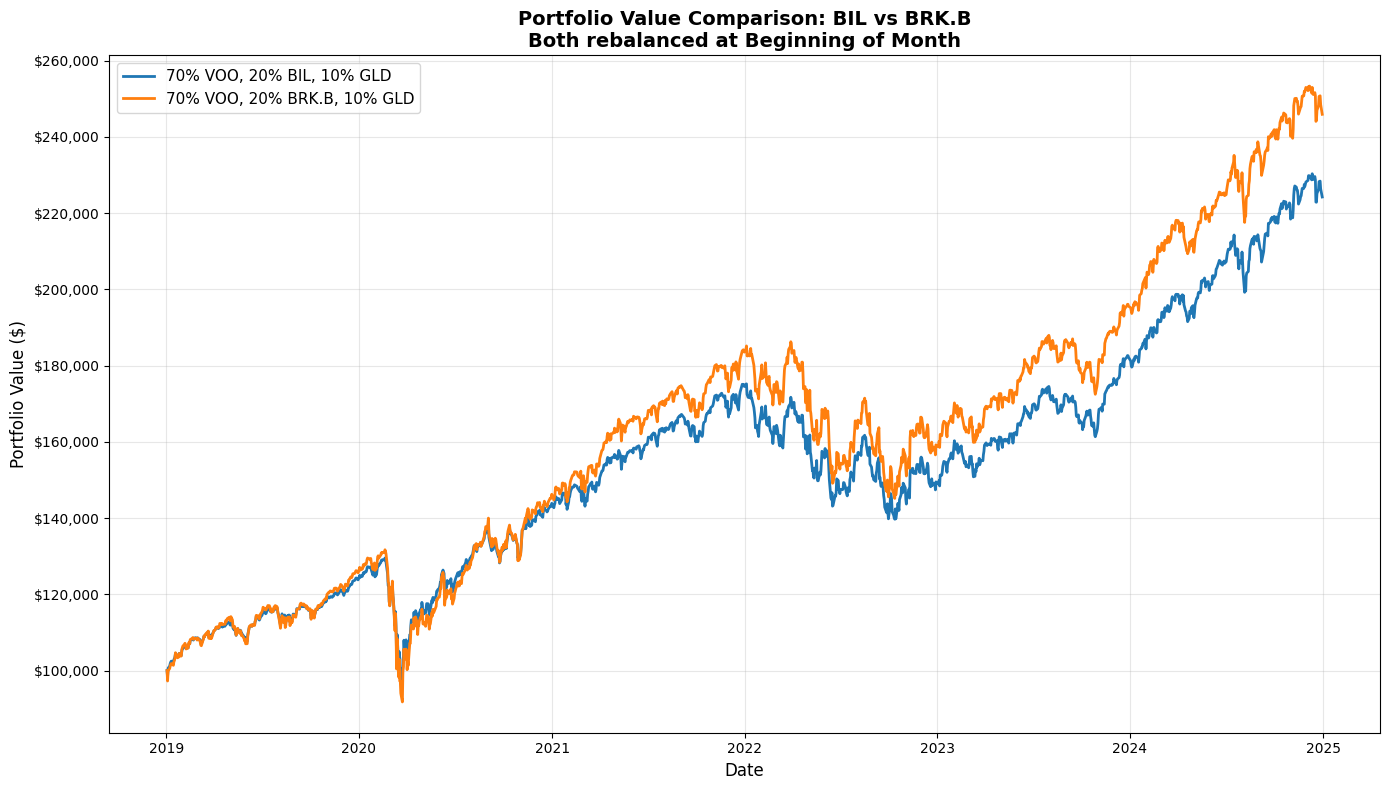


Final Portfolio Values
70% VOO, 20% BIL, 10% GLD:   $224,219.16
70% VOO, 20% BRK.B, 10% GLD: $245,905.32

Difference: $21,686.15 (9.67%)


In [26]:
# Visualize portfolio values over time for BIL and BRK.B strategies
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Get portfolio values for each strategy
def get_portfolio_values(allocation):
    unique_steps = sorted(allocation.portfolio_df.index.get_level_values(0).unique())
    values = []
    for step in unique_steps:
        total_value = allocation.get_total_portfolio_value(step)
        values.append(total_value)
    return unique_steps, np.array(values)

bil_steps, bil_values = get_portfolio_values(start_of_month_allocation)
brkb_steps, brkb_values = get_portfolio_values(voo_brkb_gold_allocation)

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(bil_steps, bil_values, label='70% VOO, 20% BIL, 10% GLD', linewidth=2)
ax.plot(brkb_steps, brkb_values, label='70% VOO, 20% BRK.B, 10% GLD', linewidth=2)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Portfolio Value ($)', fontsize=12)
ax.set_title('Portfolio Value Comparison: BIL vs BRK.B\nBoth rebalanced at Beginning of Month', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print final values comparison
print("\n" + "=" * 80)
print("Final Portfolio Values")
print("=" * 80)
print(f"70% VOO, 20% BIL, 10% GLD:   ${bil_values[-1]:,.2f}")
print(f"70% VOO, 20% BRK.B, 10% GLD: ${brkb_values[-1]:,.2f}")
print(f"\nDifference: ${brkb_values[-1] - bil_values[-1]:,.2f} ({((brkb_values[-1] / bil_values[-1]) - 1) * 100:.2f}%)")


### Summary: BIL vs BRK.B Strategy Comparison

This comparison evaluates two portfolio strategies, both rebalanced at the beginning of each month:




- **Strategy 1**: 70% VOO, 20% BIL, 10% GLD
- **Strategy 2**: 70% VOO, 20% BRK.B, 10% GLD

Strategy 2 has better return but SR and MAR is slightly lower than 1


# New Allocation Strategy: VOO + VWO + RAAX

- VWO emerging market ETF
- RAAX real asset

Compare new strategy (60% VOO, 20% VWO, 20% RAAX) with previous strategy (70% VOO, 20% BIL, 10% GLD)
Both rebalanced at start of month


In [27]:
# Load and prepare data for VWO and RAAX
vwo_df = alpaca.query('VWO', '2019-01-01', '2024-12-31', '1D')
raax_df = alpaca.query('RAAX', '2019-01-01', '2024-12-31', '1D')

# Fix the index to set it to market open time (9:30 AM) for both DataFrames
for df in [vwo_df, raax_df]:
    # Set date as index if not already set
    if df.index.name != 'date' and 'date' in df.columns:
        df.set_index('date', inplace=True)
    
    # Set index to market open time (9:30 AM) to match rebalance time requirements
    market_open_index = df.index.normalize() + pd.Timedelta(hours=9, minutes=30)
    market_open_index = market_open_index.tz_convert("America/New_York")
    df.index = market_open_index
    df.index.name = "date"


Loading bar data...
Loaded bar data: 0:00:01 

Loading bar data...
Loaded bar data: 0:00:00 



In [28]:
# Validate that VOO, VWO, and RAAX dataframes have identical indices
import logging

# Get logger
logger = logging.getLogger("default_logger")

# Check index properties
logger.info("Checking DataFrame index compatibility...")
logger.info(f"VOO index length: {len(voo_df.index)}")
logger.info(f"VWO index length: {len(vwo_df.index)}")
logger.info(f"RAAX index length: {len(raax_df.index)}")

# Check index types
logger.info(f"VOO index type: {type(voo_df.index)}, dtype: {voo_df.index.dtype}")
logger.info(f"VWO index type: {type(vwo_df.index)}, dtype: {vwo_df.index.dtype}")
logger.info(f"RAAX index type: {type(raax_df.index)}, dtype: {raax_df.index.dtype}")

# Check timezone information
voo_tz = getattr(voo_df.index, 'tz', None)
vwo_tz = getattr(vwo_df.index, 'tz', None)
raax_tz = getattr(raax_df.index, 'tz', None)
logger.info(f"VOO timezone: {voo_tz}")
logger.info(f"VWO timezone: {vwo_tz}")
logger.info(f"RAAX timezone: {raax_tz}")

# Use pandas Index.equals() for strict comparison
voo_equals_vwo = voo_df.index.equals(vwo_df.index)
voo_equals_raax = voo_df.index.equals(raax_df.index)
vwo_equals_raax = vwo_df.index.equals(raax_df.index)

if voo_equals_vwo and voo_equals_raax and vwo_equals_raax:
    logger.info("All DataFrame indices are strictly identical (using Index.equals()).")
else:
    logger.warning("DataFrame indices are NOT strictly identical!")
    if not voo_equals_vwo:
        logger.warning("VOO and VWO indices are not equal")
    if not voo_equals_raax:
        logger.warning("VOO and RAAX indices are not equal")
    if not vwo_equals_raax:
        logger.warning("VWO and RAAX indices are not equal")

# Check for dates present in one but not others using set comparison
voo_index_set = set(voo_df.index)
vwo_index_set = set(vwo_df.index)
raax_index_set = set(raax_df.index)

common_dates = voo_index_set & vwo_index_set & raax_index_set
logger.info(f"Common dates across all three dataframes: {len(common_dates)}")
if len(common_dates) < len(voo_df.index):
    logger.warning(f"Only {len(common_dates)}/{len(voo_df.index)} dates are common across all dataframes")


INFO:default_logger:Checking DataFrame index compatibility...
INFO:default_logger:VOO index length: 1509
INFO:default_logger:VWO index length: 1509
INFO:default_logger:RAAX index length: 1509
INFO:default_logger:VOO index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:VWO index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:RAAX index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, dtype: datetime64[ns, America/New_York]
INFO:default_logger:VOO timezone: America/New_York
INFO:default_logger:VWO timezone: America/New_York
INFO:default_logger:RAAX timezone: America/New_York
INFO:default_logger:All DataFrame indices are strictly identical (using Index.equals()).
INFO:default_logger:Common dates across all three dataframes: 1509


In [29]:
# Create VOO + VWO + RAAX Fix Ratio Allocation (60% VOO, 20% VWO, 20% RAAX)
# Rebalance at beginning of month
from tiportfolio.strategy_library.trading.long_hold import LongHold
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

# Use the same config as before
config: PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.04,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

# Create LongHold strategies for each asset
voo_strategy_new = LongHold(stock_symbol="VOO", prices=voo_df)
vwo_strategy = LongHold(stock_symbol="VWO", prices=vwo_df)
raax_strategy = LongHold(stock_symbol="RAAX", prices=raax_df)

# Create allocation: 60% VOO, 20% VWO, 20% RAAX
# Rebalance at beginning of month
voo_vwo_raax_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[voo_strategy_new, vwo_strategy, raax_strategy],
    allocation_ratio_list=[0.6, 0.2, 0.2],
    rebalance_frequency=RebalanceFrequency.start_of_month,
)

print("Running new strategy (60% VOO, 20% VWO, 20% RAAX) with beginning of month rebalance...")
voo_vwo_raax_allocation.walk_forward()
voo_vwo_raax_allocation.evaluate()
print("New strategy simulation completed!")


INFO:default_logger:Initialized Allocation with 3 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - VOO
INFO:default_logger: - Strategy: LongHold - VWO
INFO:default_logger: - Strategy: LongHold - RAAX
INFO:default_logger:Starting walk-forward allocation process...


Running new strategy (60% VOO, 20% VWO, 20% RAAX) with beginning of month rebalance...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - VWO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-02 09:30:00-05:00, Strategy LongHold - RAAX generated signal: TradingSignal.LONG
DEBUG:default_logger:Rebalancing at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - VWO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-03 09:30:00-05:00, Strategy LongHold - RAAX generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VOO generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - VWO generated signal: TradingSignal.LONG


Starting portfolio evaluation...


  0%|          | 0/1509 [00:00<?, ?it/s]DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Rebalance occurred at 2019-01-02 09:30:00-05:00
DEBUG:default_logger:Total value: 99990.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 98237.9453824553
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100795.2637974365
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade data

New strategy simulation completed!


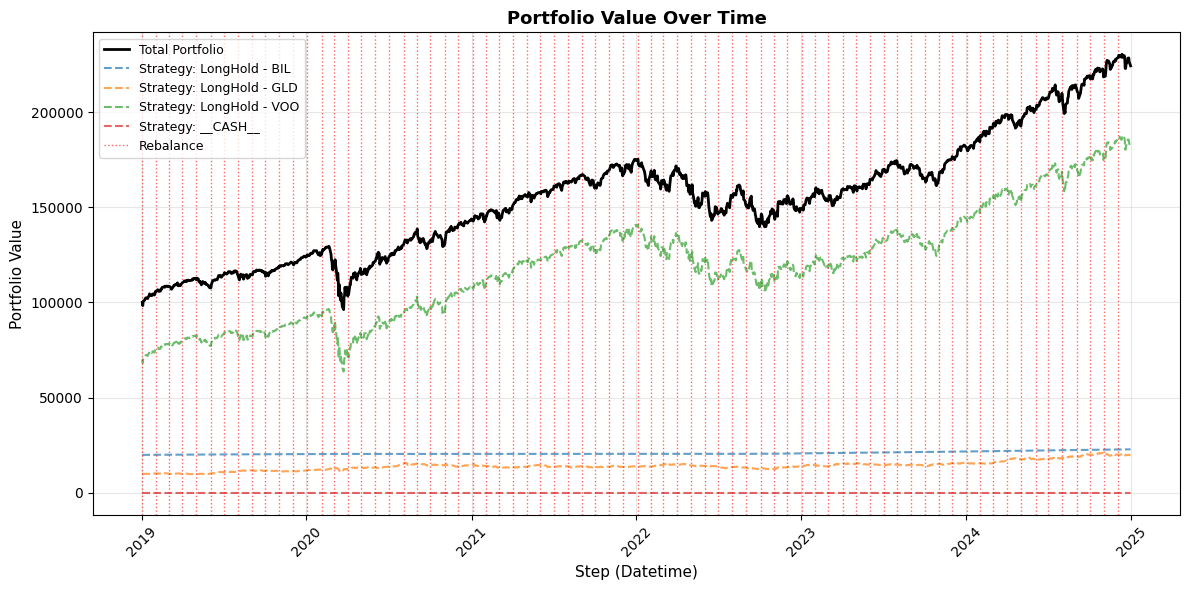

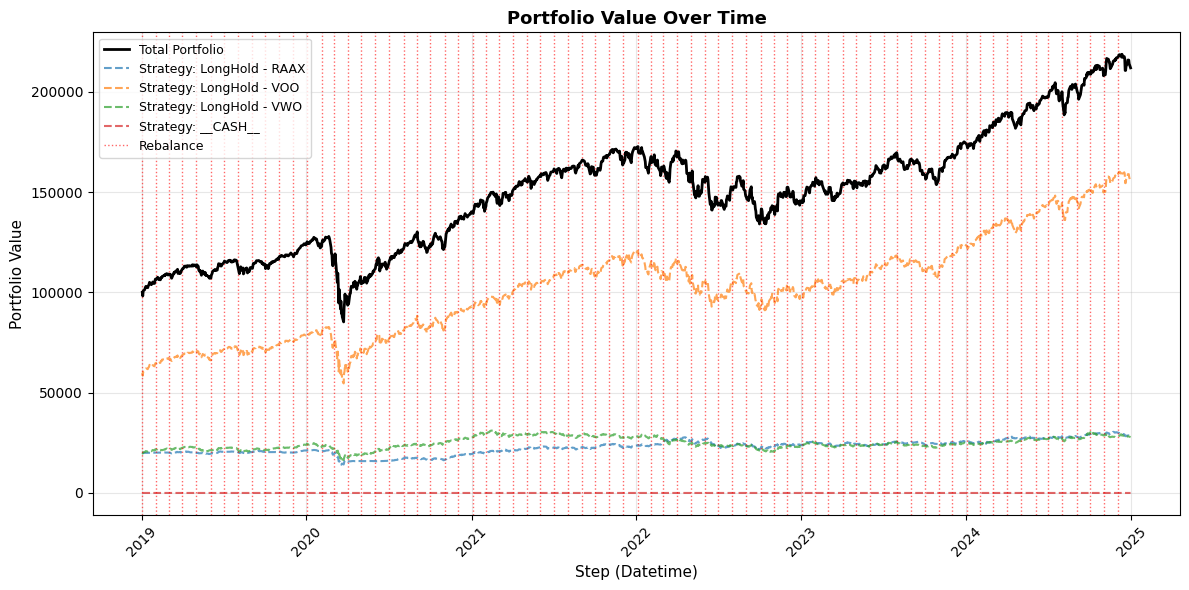

Performance Metrics Comparison
Both strategies rebalanced at Beginning of Month
                              final_value  total_return  max_drawdown  sharpe_ratio  annualized_return  mar_ratio
70% VOO, 20% BIL, 10% GLD   224219.164576      1.242192     -0.256632      0.698037           0.144460   4.840370
60% VOO, 20% VWO, 20% RAAX  211980.998579      1.119810     -0.333193      0.529382           0.133776   3.360841

Detailed Comparison

70% VOO, 20% BIL, 10% GLD:
----------------------------------------
  final_value: $224,219.16
  total_return: 1.2422 (124.22%)
  max_drawdown: -0.2566 (-25.66%)
  sharpe_ratio: 0.698037
  annualized_return: 0.1445 (14.45%)
  mar_ratio: 4.840370

60% VOO, 20% VWO, 20% RAAX:
----------------------------------------
  final_value: $211,981.00
  total_return: 1.1198 (111.98%)
  max_drawdown: -0.3332 (-33.32%)
  sharpe_ratio: 0.529382
  annualized_return: 0.1338 (13.38%)
  mar_ratio: 3.360841


In [30]:
# Compare performance metrics between new strategy and previous strategy
# New: 60% VOO, 20% VWO, 20% RAAX
# Previous: 70% VOO, 20% BIL, 10% GLD
# Both rebalanced at beginning of month
import pandas as pd

# Get metrics for each allocation
previous_metrics = start_of_month_allocation.get_performance_metrics(plot=True)
new_metrics = voo_vwo_raax_allocation.get_performance_metrics(plot=True)

# Create comparison dataframe
comparison_data = {
    '70% VOO, 20% BIL, 10% GLD': previous_metrics,
    '60% VOO, 20% VWO, 20% RAAX': new_metrics,
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.T  # Transpose so strategies are rows

# Display comparison table
print("=" * 80)
print("Performance Metrics Comparison")
print("Both strategies rebalanced at Beginning of Month")
print("=" * 80)
print(comparison_df.to_string())

# Print formatted comparison
print("\n" + "=" * 80)
print("Detailed Comparison")
print("=" * 80)

for strategy_name, metrics in comparison_data.items():
    print(f"\n{strategy_name}:")
    print("-" * 40)
    for key, value in metrics.items():
        if key == 'final_value':
            print(f"  {key}: ${float(value):,.2f}")
        elif key in ['total_return', 'annualized_return']:
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        elif key == 'max_drawdown':
            print(f"  {key}: {float(value):.4f} ({float(value)*100:.2f}%)")
        else:
            print(f"  {key}: {float(value):.6f}")


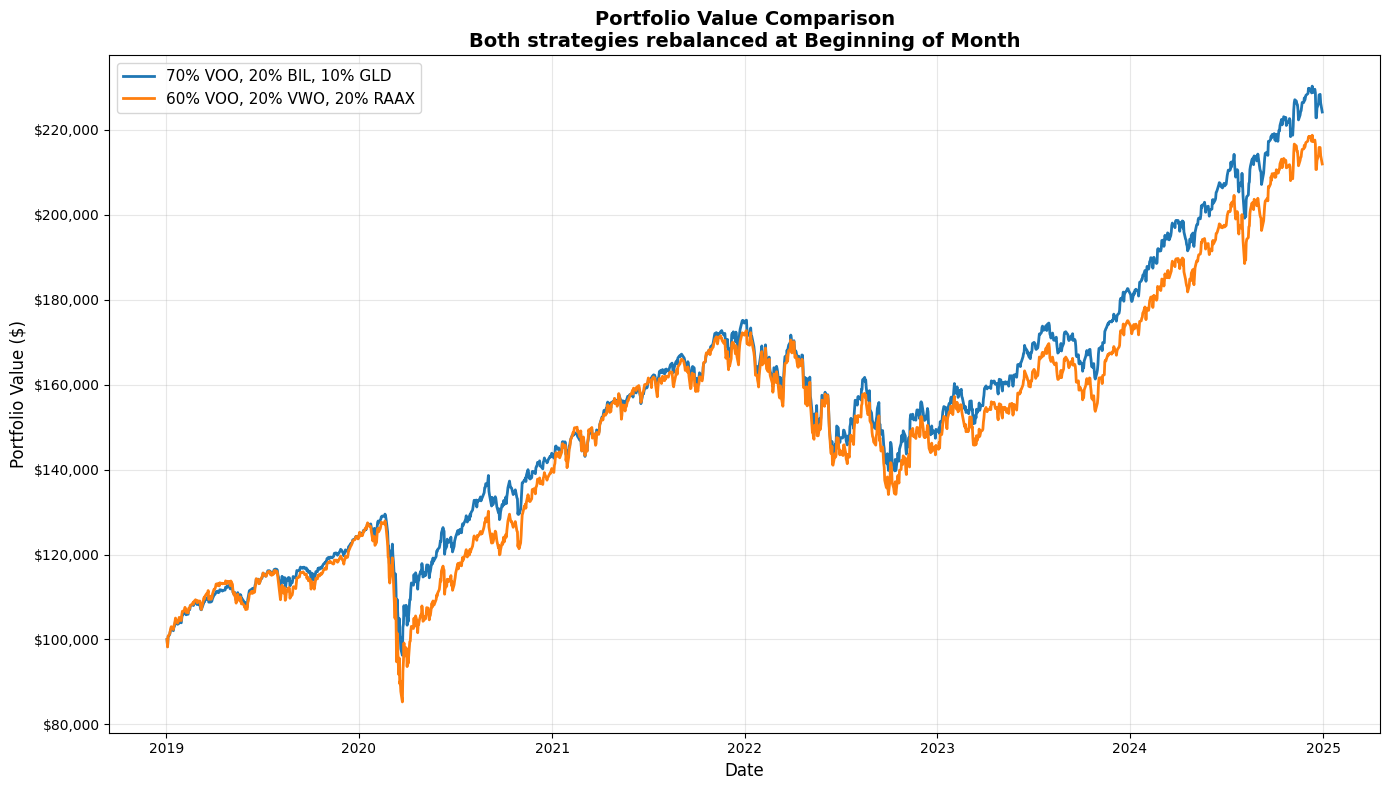


Final Portfolio Values
70% VOO, 20% BIL, 10% GLD:   $224,219.16
60% VOO, 20% VWO, 20% RAAX: $211,981.00

Difference: $-12,238.17 (-5.46%)


In [31]:
# Visualize portfolio values over time for both strategies
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Get portfolio values for each strategy
def get_portfolio_values(allocation):
    unique_steps = sorted(allocation.portfolio_df.index.get_level_values(0).unique())
    values = []
    for step in unique_steps:
        total_value = allocation.get_total_portfolio_value(step)
        values.append(total_value)
    return unique_steps, np.array(values)

previous_steps, previous_values = get_portfolio_values(start_of_month_allocation)
new_steps, new_values = get_portfolio_values(voo_vwo_raax_allocation)

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(previous_steps, previous_values, label='70% VOO, 20% BIL, 10% GLD', linewidth=2)
ax.plot(new_steps, new_values, label='60% VOO, 20% VWO, 20% RAAX', linewidth=2)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Portfolio Value ($)', fontsize=12)
ax.set_title('Portfolio Value Comparison\nBoth strategies rebalanced at Beginning of Month', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print final values comparison
print("\n" + "=" * 80)
print("Final Portfolio Values")
print("=" * 80)
print(f"70% VOO, 20% BIL, 10% GLD:   ${previous_values[-1]:,.2f}")
print(f"60% VOO, 20% VWO, 20% RAAX: ${new_values[-1]:,.2f}")
print(f"\nDifference: ${new_values[-1] - previous_values[-1]:,.2f} ({((new_values[-1] / previous_values[-1]) - 1) * 100:.2f}%)")


### Summary
Using VWO and RAAX is not better than BIL and GLD, 0.5 SR to 0.6 SR.